Before beginning:

Install all the necessary packages by running `pip install -r ../utils/requirements.txt` in a Terminal window, or running the following code block:

In [ ]:
%pip install pandas
%pip install plotly
%pip install nltk

# Vibe Check:
## Using Twitter’s API and Sentiment Analysis to Understand What’s the What on the Internet

Today's Agenda:
1. Who We Are
2. What are APIs?
3. Using the Twitter API
4. Basic Data Operations and Data Cleaning
5. Sentiment Analysis With Python using NLTK


 # Who We Are


## Annabelle Gary
_she/her/hers_
<div class='row row-cols-2'>
    <div class='col-7'>
        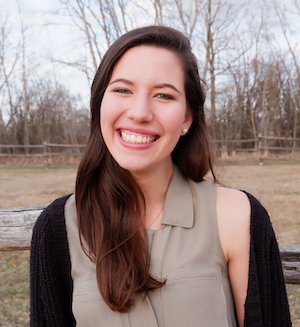
    </div>
    <div class='col-3' style='vertical-align:middle; display:inline; word-wrap:normal'>
        <ul style="word-break: break-word; width:75%">
            <li> Solutions Engineer at FiscalNote </li>
            <li> Work with internal and external clients to develop technical solutions to solve their problems </li>
            <li> Currently building FiscalNote’s API! </li>
            <li> Undergrad Major: Anthropology and Environmental Studies </li>
           </ul>
    </div>
</div>



## Karnika Arora
_she/her/hers_

<div class='row row-cols-2'>
<div class='col-9'>
    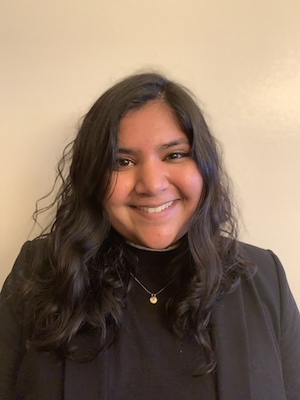
</div>
    <div class='col-3' style='vertical-align:middle; display:inline; word-wrap:normal'>
        <ul style="word-break: break-word; width:75%">
            <li>Manager of the Solutions Engineering Team at FiscalNote </li>
            <li> Works with everyone from executives to engineers to salespeople to develop and execute strategy and technical architecture </li>
            <li> Currently working on building a web application </li>
            <li> Undergrad Major: Political Science and Global Development Studies </li>
        </ul>
    </div>
 </div>

## ![https://s3.amazonaws.com/app.fiscalnote.com/assets/images/FiscalNote-Logos/fn-logo-03-700x100.png](https://s3.amazonaws.com/app.fiscalnote.com/assets/images/FiscalNote-Logos/fn-logo-03-700x100.png)


- The leading technology provider of global policy and market intelligence
- A business-to-business (B2B) (Software-as-a-Service) SaaS platform 
- Helps professionals who need to keep track of legislation, regulations, and more in the US and globally

# What are APIs?

An API, or "Application Programming Interface", is the most popular way to access data programmatically - API documentation will tell our clients what is available and how to “ask” our API for it.

If you've ever seen tweets embedded on a webpage, those were pulled in via an API!

Most modern APIs return data in JSON format - the API we will be working with today does as well. JSON is a data format, just like an excel file is a format in which we store data - but JSON is more flexible and more lightweight, which makes it a great option for exchanging data over the internet.

`{"date": "2022-11-26"}`


# Using the Twitter API 

Today, we're going to access Twitter API data using Python. First, we'll set up some libraries and then our API authentication information.

We have our "token" stored in a file - this is like a secret password that belongs only to us, so Twitter knows exactly who is making the request. We're going to read the data in after our imports, and set up our API request URL and the headers for the request.


In [1]:
import requests # We use this library to make HTTP requests
import json # To parse through the JSON data we get back from the API
import ipywidgets as widgets # We'll use this to create interactive widgets to enter variables
from IPython.display import display, clear_output # This allows us to view charts and other visual elements

# Load in the token from a file:
with open(f"../utils/bearer_token.txt", "r") as token_file:
    bearer_token = token_file.read()
    
headers = {
    "Authorization": f"Bearer {bearer_token}"
}
search_url = "https://api.twitter.com/2/tweets/search/recent?"

You'll notice that we also set up what we need to make the actual request to the Twitter API, the headers and the request url:
1. **Headers**: This information tells Twitter exactly who we are:
    - Authorization: **`bearer_token`**: the secret password, this lets twitter know that we are allowed to access this data
2. **Search URL** The URL we're going to request data from. In this case: `https://api.twitter.com/2/tweets/search/recent` - We figured this out by looking at Twitter's API documentation. Most APIs have extensive documentation that will help you decide what request URL to use. Take a look at Twitter's API documentation here:

[Twitter API Documentation](https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction)

 <!---
    - **`api.twitter.com`**: tells Twitter we're trying to hit the API, as opposed to the main feed/user interface.
    - **`2`**: shows that we're hitting Version 2.0 of the API. If we put `1` instead, we would hit the 1st version, which would both require slightly different request syntax, and would return data formatted differently.
    - **`tweets`**: indicates which data type we want to request. We could also input `users`, `spaces`, or `lists` to get different datatypes back.
    - **`search`**: says we want to search over tweets. We could also put `counts` to get the number of tweets, or we could look up tweets directly by their IDs. `search` allows us to give Twitter a query - a set of terms we want to include or exclude - and we'll get back tweets that match our query terms.
    - **`recent`**: Twitter allows you to search either over only Tweets from the last week, or `all` Tweets, depending on your level of access. We'll stick to `recent`, because we're interested in what's happening on Twitter right now. 
-->

## Building a Query

See: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

- Search queries are used all throughout the internet - Google, Twitter - pretty much any app you've used allows you to search. If you've ever used the Google advanced search feature before, you'll notice that we use some similar syntax here to construct our search queries.

- Our initial search will try to find tweets about the World Cup - and then we'll take input from all of you and search for something you want to see!


In [ ]:
query_string = '#FIFAWorldCup ' # tweets with a #FIFAWorldCup hashtag
query_string += '"england" ' # tweets that have "england" somewhere in their text
query_string += '-is:retweet ' # do not include retweets
query_string += 'lang:en ' # only include English language tweets
print(query_string)

See all the different operators types you can add to your search here: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#operators

> **Optional Fields**
>
>- tweet.fields lets us add specific fields -  here we add `created_at`
>
>**Query String**
>
>- `is:retweet` *excludes* any retweets


### Now, let's turn our query string into a widget that we can easily edit:

In [ ]:
query_widget = widgets.Textarea(
    value= query_string,
    placeholder='Enter a search string',
    description='Search:',
    disabled=False, 
    layout = widgets.Layout(flex='flex-grow', width="80%", height="100px")
)

display(query_widget)

# Making the API Request

## GET vs POST requests

When using APIs, there are multiple ways you can engage with them. The API Documentation will tell you what you're able to do, but one important thing to know about is what _type_ of requests you can make.

- `GET` requests are exactly what they sound like - you usually use them to _GET_ data back from the API. 
- `POST` requests are a little more complicated, but generally they are used to _create_ data via the API. Any Twitter Bot you see is going to be using POST requests to create Tweets. See: https://twitter.com/MagicRealismBot

Here, we'll make a `GET` request to get our response back from Twitter.


In [ ]:
print(f"Search URL: {search_url}")
#print(f"Headers: {headers}")

In [ ]:
query_params = {'query': query_widget.value,
                'tweet.fields': 'created_at,id,lang,source,text', # what data we want to return
                'expansions': 'author_id', # will include the profile ID of the author
                'max_results': 100 
               }

response = requests.get(url=search_url,params=query_params,
                       headers=headers)
print(f"Status Code: {response.status_code}, Message: {response.reason}")

# HTTP Status Codes

You've probably noticed that any website url will start with 'HTTP' - this stands for 'Hypertext Transfer Protocol', and this protocol decides how _servers_ and _browsers_ communicate. We don't have to get to deep into this, but it can be useful to understand what certain HTTP codes mean: 

 - **`200`**: This is a 'successful' response from the server


 - **`400`**: The server is telling you that you made a bad request


 - **`401`**: Unauthorized - the server is telling you that your authentication information is expired or incorrect


 - **`500`**: Server Error - the server failed to respond - something went wrong on the website's end, not yours

In [ ]:
data = response.json()["data"]
print(json.dumps(data, indent=2))

# Basic Data Operations and Data Cleaning

## Visualizing Our Data
 
We'll use two Python libraries, `plotly` and `pandas`, to understand our Tweets a little bit better.
 
First, let's get _counts_ for our query and see what our data looks like:

In [ ]:
count_request = "https://api.twitter.com/2/tweets/counts/recent"
count_query = {
    "query": query_params['query'],
    "granularity": "day"
}
tweet_counts = requests.get(count_request, params=count_query, headers=headers)
print(tweet_counts.status_code)
print(json.dumps(tweet_counts.json(), indent=2))

In [ ]:
import plotly.express as px # We'll use plotly to create some graphs
import plotly.graph_objs as go # Ditto
import pandas as pd # Pandas is a popular library used for data operations, mostly with dataframes, which is a popular data format

tweet_count_df = pd.DataFrame(tweet_counts.json()["data"]) 
tweet_count_df.head(5)


In [ ]:
from datetime import datetime as dt

# Create a new column with just the simplified day
for i, r in tweet_count_df.iterrows():
    tweet_count_df.loc[i, 'day'] = dt.strptime(tweet_count_df.loc[i, 'start'], "%Y-%m-%dT%H:%M:%S.%fZ").date()
    
tweet_count_df.head(5)

# When did dates get so complicated?

**`2022-11-29T04:31:54.000Z`**

This date format is pretty complex, and it includes a lot of information. This date is in the ISO 8601 representation - a standard format that all modern computers can understand. Before we simplify it a bit, let's see what each component means:
 - %Y - 2022 - The full four-digit date
 - %m - 11 - Two digit month (01 if it's 1)
 - %d - 29 - Two digit date
 
<!--  
- T - this marks the start of a timestamp
 - %H - 24h hour
 - %M - minute
 - %S - second 
 - %f - milliseconds
 - Z - timezone offset -->
> This time format can also be described as `%Y-%m-%dT%H:%M:%S.%fZ`

# Visualizing Tweet Counts

In [ ]:
fig = go.Figure(data=go.Scatter(x=tweet_count_df['day'].astype(dtype=str), 
                        y=tweet_count_df['tweet_count'],
                        marker_color='mediumvioletred', text="tweet_count"))
fig.update_layout({"title": 'Recent Tweets',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Total # of tweets"},
                   "showlegend": False})
fig.show(renderer="notebook")

In [ ]:
# Creates a function with the code from the first section so we can rerun it for the sentiment analysis portion
# Create query widget before calling this function by running display(query_widget)
# First obj returned is the count chart (display using fig.show(), second is the tweets obj)

def get_tweets():
    query_params = {'query': query_widget.value,
                    'tweet.fields': 'created_at,id,lang,source,text', # what data we want to return
                    'expansions': 'author_id',     # will include the profile ID of the author
                    'max_results': 100
                   }
    response = requests.get(url=search_url,params=query_params,
                       headers=headers)
    if response.json().get('meta', {}).get('result_count') == 0:
        print("No results!")
        return None, None
    print(response.status_code)
    count_request = "https://api.twitter.com/2/tweets/counts/recent"
    count_query = {
    "query": query_params['query'],
    "granularity": "day"
    }
  
    tweet_counts = requests.get(count_request, params=count_query, headers=headers)
    
    tweet_count_df = pd.DataFrame(tweet_counts.json()["data"]) 
    tweet_count_df.head(5)

    for i, r in tweet_count_df.iterrows():
        tweet_count_df.loc[i, 'day'] = dt.strptime(tweet_count_df.loc[i, 'start'], "%Y-%m-%dT%H:%M:%S.%fZ").date()
    fig = go.Figure(data=go.Scatter(x=tweet_count_df['day'].astype(dtype=str), 
                        y=tweet_count_df['tweet_count'],
                        marker_color='mediumvioletred', text="tweet_count"))
    fig.update_layout({"title": 'Recent Tweets',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Total # of tweets"},
                   "showlegend": False})
    return fig, response.json()['data']
    

# Sentiment Analysis With Python using NLTK

<!--- 
Reference: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
-->

## What is sentiment analysis?

If you read a book and it makes you cry, something in the words is sad -- the _sentiment_ of the words is sad.

But how can we capture and quantify that sentiment? Is it 100% sad, or only 51% sad? We determine this by looking at the words in a sentence: words like `sad, crying, mean, lose` will have a negative sentiment, and words like `happy, smiling, nice, win` will have a positive sentiment. Counting the positive vs negative words in a sentence can tell us the overall sentiment of the sentence.

### Natural Language Processing

NLP is an intersection of lingustics and computer science that allows machines to understand real-world, messy, "natural" language. Voice assistants like Siri or Alexa use natural language processing to interpret what humans say and generate a response  that makes sense. Sentiment analysis is one small part of NLP.

## Natural Language Toolkit
There are lots of tools out there that we can use. We'll use one today called Natural Language Toolkit (`nltk`), which is a common Python library that gives us some simple ways of processing data using NLP.

In [ ]:
import nltk
# nltk.download(["names", "stopwords", "averaged_perceptron_tagger", "vader_lexicon","punkt"])


## Collect Words From Tweets

In [ ]:
words = []
json_response = response.json()['data']
for item in json_response:
    words.extend(nltk.word_tokenize(item.get('text')))
print(words)

## Remove Unnecessary Words And Symbols

In [ ]:
# Ignore anything like "the", "and", emojis, and non-words
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

words_clean = [w for w in words if w.isalpha() and w.lower() not in unwanted and w != 'https']
print(words_clean)

## Which Words Are the Most Common?

In [ ]:
# Let's create a frequency distribution to see which words are used the most
fd = nltk.FreqDist(words_clean)
print(fd.tabulate(10))

## Sentiment Analysis

In [ ]:
def clean_up_tweets(tweets):
    tweet_words = []
    tweets = [t['text'].replace("://", "//") for t in tweets]
    for item in tweets:
        words = nltk.word_tokenize(item)
        words_clean = [w for w in words if w.isalpha() and w.lower() not in unwanted and w != 'https']
        if words_clean:
            tweet_words.append({'tweet': item, 'words': " ".join(words_clean)})
    return tweet_words

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

tweets = clean_up_tweets(json_response)

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0, sia.polarity_scores(tweet)["compound"]

compound_sentiment = {'tweet': [], 'pos': [], 'comp_score': []}

for t in tweets:
    compound_sentiment['tweet'].append(t['tweet'])
    is_pos, score = is_positive(t['words'])
    compound_sentiment['pos'].append(is_pos)
    compound_sentiment['comp_score'].append(score)

compound_sentiment_df = pd.DataFrame(compound_sentiment)
compound_sentiment_df.head(5)



## Visualizing Tweet Sentiment

In [ ]:
mean_sentiment = compound_sentiment_df.mean(numeric_only=True)['comp_score']
print(mean_sentiment)
tw_options = [(compound_sentiment_df.loc[i, 'tweet'], compound_sentiment_df.loc[i, 'comp_score']) for i, r in compound_sentiment_df.iterrows()]
tw_options.append(('Average Score', mean_sentiment))
tw_select = widgets.Dropdown(options=tw_options,
                             value = mean_sentiment,
                             description='Tweet:')
caption = widgets.Label(value='initial pos')


In [ ]:
from IPython.display import clear_output

def create_gauge(tw_select=tw_select):
    fig_gc = go.Figure(go.Indicator(
        mode= "gauge+number",
        value = tw_select.value,
        gauge = {'axis': {'range': [-1, 1]},
                 'bar': {'color':'darkslategray'},
                 'steps': [{'range': [-1, 0], 'color': 'lightcoral'}, {'range': [0, 1], 'color': 'lightgreen'}]},
        domain = {'x': [0,1], 'y': [0,1]},
        title = "Average sentiment"))
    # make space for explanation / annotation
    fig_gc.update_layout(margin=dict(l=20, r=20, t=20, b=60),paper_bgcolor="white")

    # add annotation
    fig_gc.add_annotation(dict(font=dict(color='darkslategray',size=15),
                               x=0,
                               y=-0.12,
                               showarrow=False,
                               text=tw_select.label,
                               textangle=0,
                               xanchor='left',
                               xref="paper",
                               yref="paper"))
    return fig_gc

gauge_chart = create_gauge()


In [ ]:
def handle_change(change):
    gauge_chart.update_traces(go.Indicator(
        mode= "gauge+number",
        value = tw_select.value,
        gauge = {'axis': {'range': [-1, 1]},
                 'bar': {'color':'darkslategray'},
                 'steps': [{'range': [-1, 0], 'color': 'lightcoral'}, {'range': [0, 1], 'color': 'lightgreen'}]},
        domain = {'x': [0,1], 'y': [0,1]},
        title = "Average sentiment"))

    gauge_chart.update_annotations(dict(font=dict(color='darkslategray',size=15),
                               x=0,
                               y=-0.12,
                               showarrow=False,
                               text=tw_select.label,
                               textangle=0,
                               xanchor='left',
                               xref="paper",
                               yref="paper"))
    clear_output()
    display(tw_select)
    gauge_chart.show(renderer="notebook")


In [ ]:
tw_select.observe(handle_change)
display(tw_select)
gauge_chart.show(renderer="notebook")

# Take Two!

What do you want to analyze?

In [ ]:
# Consolidate previous code blocks into functions

def clean_words(json_response):
    words = []
    for item in json_response:
        words.extend(nltk.word_tokenize(item.get('text')))
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    words_clean = [w for w in words if w.isalpha() and w.lower() not in unwanted and w != 'https']
    fd = nltk.FreqDist(words_clean)
    print(fd.most_common(10))
    print(fd.tabulate(5))

def analyze_sentiment(json_response):
    sia = SentimentIntensityAnalyzer()

    tweets = clean_up_tweets(json_response)
    tweets = [t for t in tweets if t['words']]

    compound_sentiment = {'tweet': [], 'pos': [], 'comp_score': []}

    for t in tweets:
        compound_sentiment['tweet'].append(t['tweet'])
        is_pos, score = is_positive(t['words'])
        compound_sentiment['pos'].append(is_pos)
        compound_sentiment['comp_score'].append(score)

    compound_sentiment_df = pd.DataFrame(compound_sentiment)
    return compound_sentiment_df

def create_widgets(compound_sentiment_df):
    mean_sentiment = compound_sentiment_df.mean(numeric_only=True)['comp_score']

    tw_options = [(compound_sentiment_df.loc[i, 'tweet'], compound_sentiment_df.loc[i, 'comp_score']) for i, r in compound_sentiment_df.iterrows()]
    tw_options.append(('Average Score', mean_sentiment))
    tw_select = widgets.Dropdown(options=tw_options,
                                 value = mean_sentiment,
                                 description='Tweet:')
    caption = widgets.Label(value='initial pos')
    gauge_chart = create_gauge(tw_select)

    return tw_select, gauge_chart
    


In [ ]:
display(query_widget)

In [ ]:
count_chart, json_response = get_tweets()
if count_chart:
    count_chart.show(renderer="notebook")

In [ ]:
clean_words(json_response)
sentiment = analyze_sentiment(json_response)
sentiment.head(5)

In [ ]:
tw_select, gauge_chart = create_widgets(sentiment)
tw_select.observe(handle_change)
display(tw_select)
gauge_chart.show()

## Thank you!!

### Questions?


### Contact Information
Karnika: karnika.arora@fiscalnote.com
Annabelle: annabelle.gary@fiscalnote.com